<a href="https://colab.research.google.com/github/pramodkumhal/Deep-Learning/blob/main/Image-classification/Cats_vs_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats-vs-Dogs-Classification

In [1]:
from google.colab import files
files.upload()      # Upload your 'cat.jpg' or 'dog.jpg' and most important kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pramodkumhal","key":"27e433c8569dcdc3374f010d938e16b6"}'}

In [2]:
# Upload kaggle.json manually first before running this cell
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:07<00:00, 137MB/s]
100% 1.06G/1.06G [00:07<00:00, 153MB/s]


In [4]:
!unzip dogs-vs-cats.zip -d dogs_vs_cats

Streaming output truncated to the last 5000 lines.
  inflating: dogs_vs_cats/train/dogs/dog.4419.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.442.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4420.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4421.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4422.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4424.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4425.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4426.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4427.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4431.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4433.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4436.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4438.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4439.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.444.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4440.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4441.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4442.jpg  
  inflating: do

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs_vs_cats/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs_vs_cats/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
# Create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size = (3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,714,625 (14.17 MB)

 Trainable params: 3,714,433 (14.17 MB)

 Non-trainable params: 192 (768.00 B)

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_ds, epochs=10,validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 67ms/step - accuracy: 0.5915 - loss: 1.0297 - val_accuracy: 0.6302 - val_loss: 0.6733
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.7066 - loss: 0.5656 - val_accuracy: 0.6764 - val_loss: 0.6974
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.7649 - loss: 0.4853 - val_accuracy: 0.7698 - val_loss: 0.4850
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.8105 - loss: 0.4093 - val_accuracy: 0.7954 - val_loss: 0.4553
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8468 - loss: 0.3423 - val_accuracy: 0.7932 - val_loss: 0.5018
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.8893 - loss: 0.2534 - val_accuracy: 0.7852 - val_loss: 0.6100
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.9219 - loss: 0.1850 - val_accuracy: 0.7776 - val_loss: 0.6417
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 58ms/step - accuracy: 0.9454 - loss: 0.1328 - 

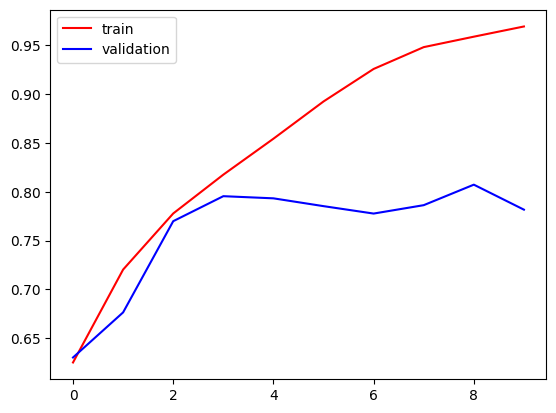

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

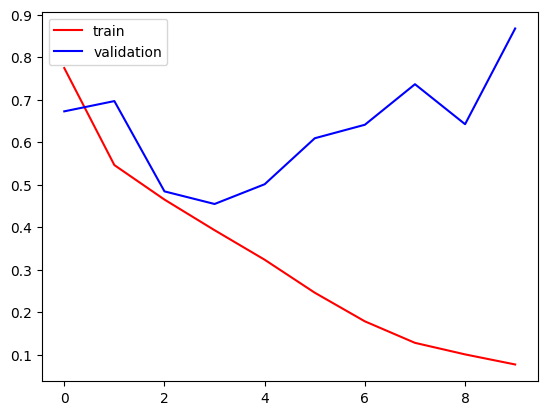

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:
import cv2

In [54]:
test_img = cv2.imread("/content/dog.jpg")

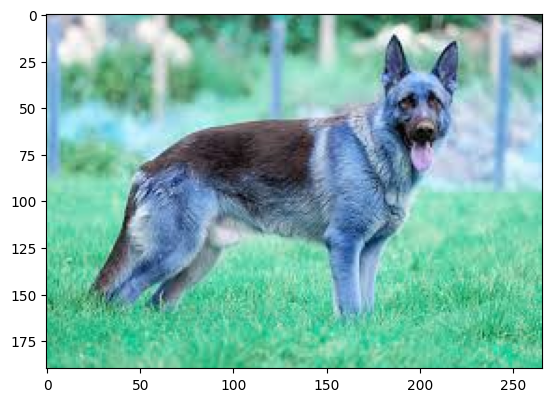

In [55]:
plt.imshow(test_img)

In [56]:
test_img.shape

(190, 266, 3)

In [57]:
test_img = cv2.resize(test_img,(256,256))

In [58]:
test_input = test_img.reshape((1,256,256,3))

In [59]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[1.]], dtype=float32)